### (S6) rlt = 6.0
```N_s_grid = 12```

```N_vpar_grid = 32``` 

```N_mu_grid = 6```

In [1]:
# Import modules
import gkw
import derivative
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [5]:
# Plot parameters
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

rc('text', usetex=True)
rc('font', family='serif', size=22)

In [3]:
# File import
data = 'S6_rlt6.0'
resolution = 'Nsgrid12_Nvpargrid32_Nmugrid6'
rlt = data.split("rlt",1)[1]
filename = '../data/'+data+'/'+resolution+'/gkwdata.h5'
f = h5py.File(filename,"r+")

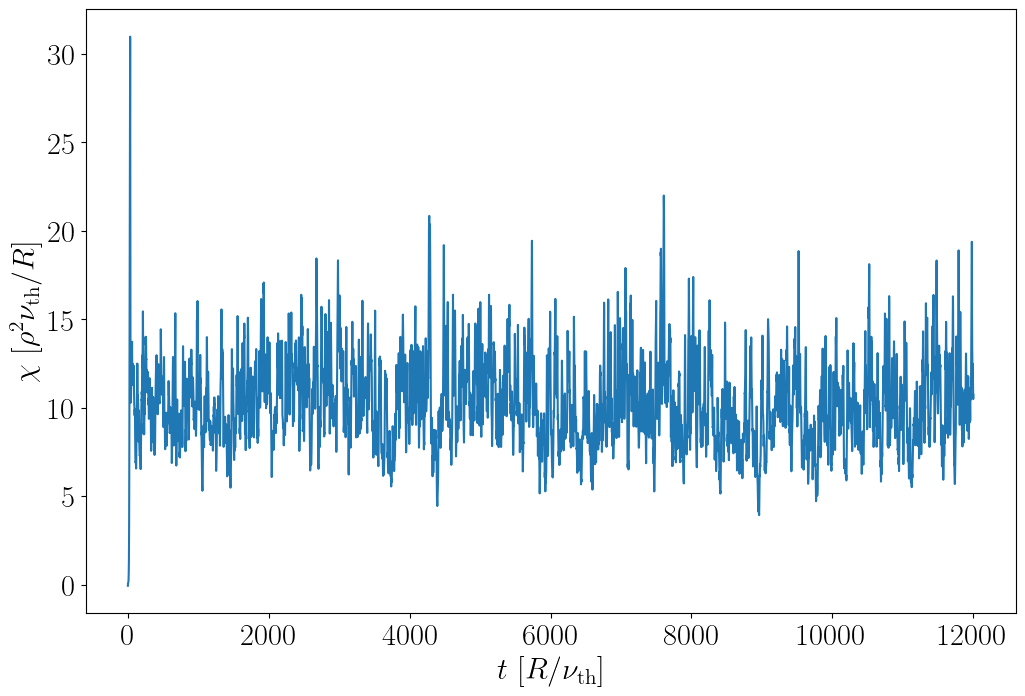

In [6]:
# Heat flux
eflux_data, time = gkw.get_eflux_from_hdf5_file(f)
plt.plot(time[0], eflux_data)

plt.xlabel(r'$t~[R/ \nu_{\mathrm{th}}]$')
plt.ylabel(r'$\chi~[\rho^2 \nu_{\mathrm{th}} / R]$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_eflux.pdf', bbox_inches='tight')

In [7]:
# Elektrostatic potencial
phi = f[gkw.find_key(f, 'phi')][()]
nx = phi.shape[0]

In [12]:
# Mean over y to get a approximation for the zonal potenzial
zonal_pot = np.mean(phi,1)

20000


In [10]:
# Finite Differnece for shearing rate omega_ExB

# Stepsize
rad_boxsize = f[gkw.find_key(f, 'lxn')][()][0]
rad_coord = f[gkw.find_key(f,'xphi')][0,:]
dx = rad_boxsize/nx

print('rad_boxsize :', rad_boxsize, '; stepsize :',dx)

rad_boxsize : 76.27048929506829 ; stepsize : 0.595863197617721


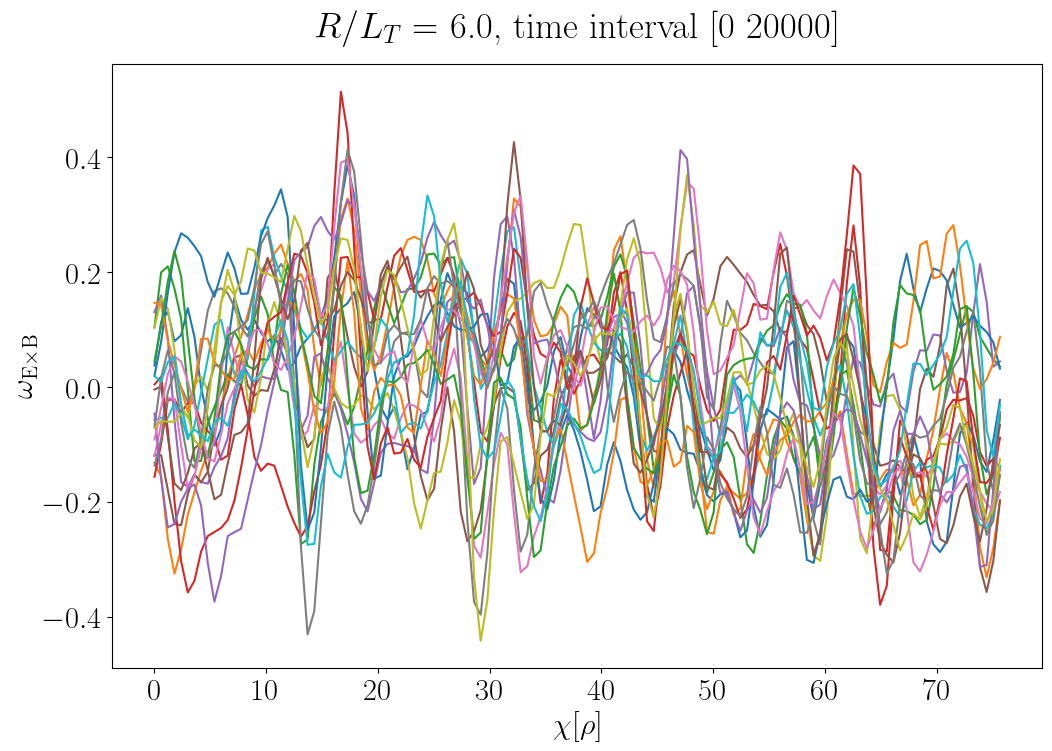

In [11]:
# Plot all
start, end = 0, 999 

while end <= zonal_pot.shape[1]:

    ddphi = derivative.finite_second_order(zonal_pot[:,start:end], dx, 'period')
    wexb = 0.5 * np.mean(ddphi,1)

    plt.plot(rad_coord, wexb)

    start += 1000
    end += 1000
    
plt.title(r'$R/L_T =$ ' + rlt + ', time interval [0 '+str(zonal_pot.shape[1])+']', pad=20)
plt.xlabel(r'$\chi[\rho]$')
plt.ylabel(r'$\omega_{\mathrm{E \times B}}$')
    
plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_all.pdf', bbox_inches='tight')

Maximal Amplitude:  0.17218713838352087


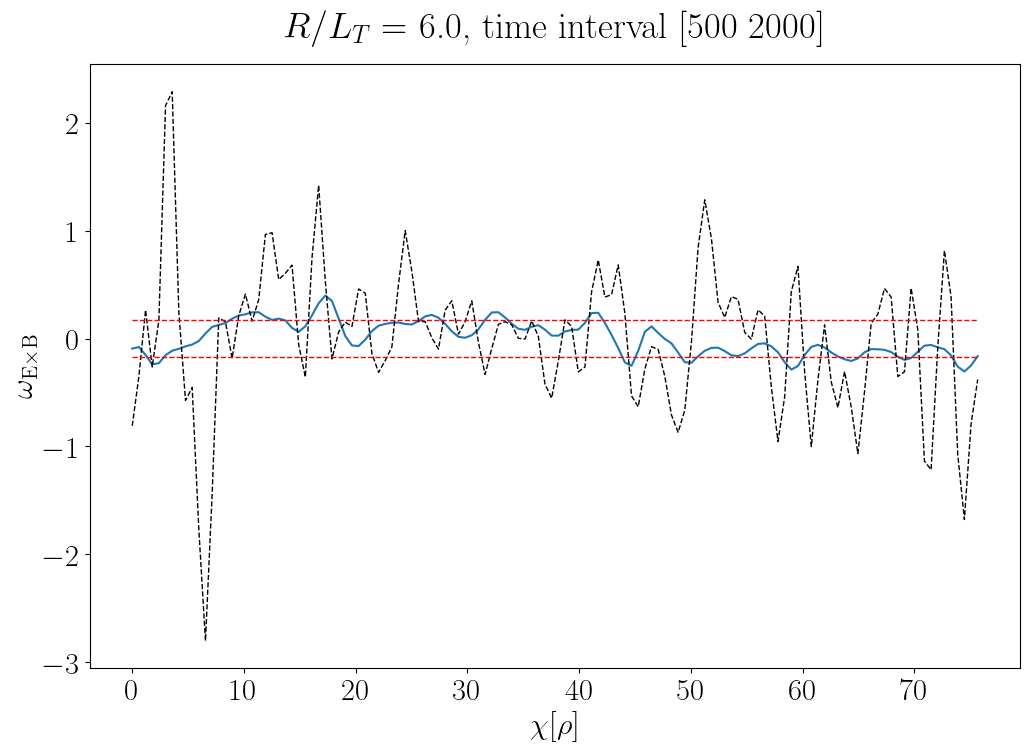

In [13]:
# Plot from 500:2000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (1250)
start, end = 500, 2000

wexb, wexb_middle = gkw.shearing_rate_wexb_interval(zonal_pot, dx, start, end)

wexb_fft = np.fft.fft(wexb)
wexb_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_fft)
wexb_amp_max = max(wexb_amp)

print('Maximal Amplitude: ', wexb_amp_max)

plt.plot(rad_coord, wexb)
plt.plot(rad_coord, wexb_middle, 'black', linestyle='--', linewidth=1)
plt.plot(rad_coord, np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
plt.plot(rad_coord, -np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)

plt.title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
plt.xlabel(r'$\chi[\rho]$')
plt.ylabel(r'$\omega_{\mathrm{E \times B}}$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

Maximal Amplitude:  0.0573411236744037


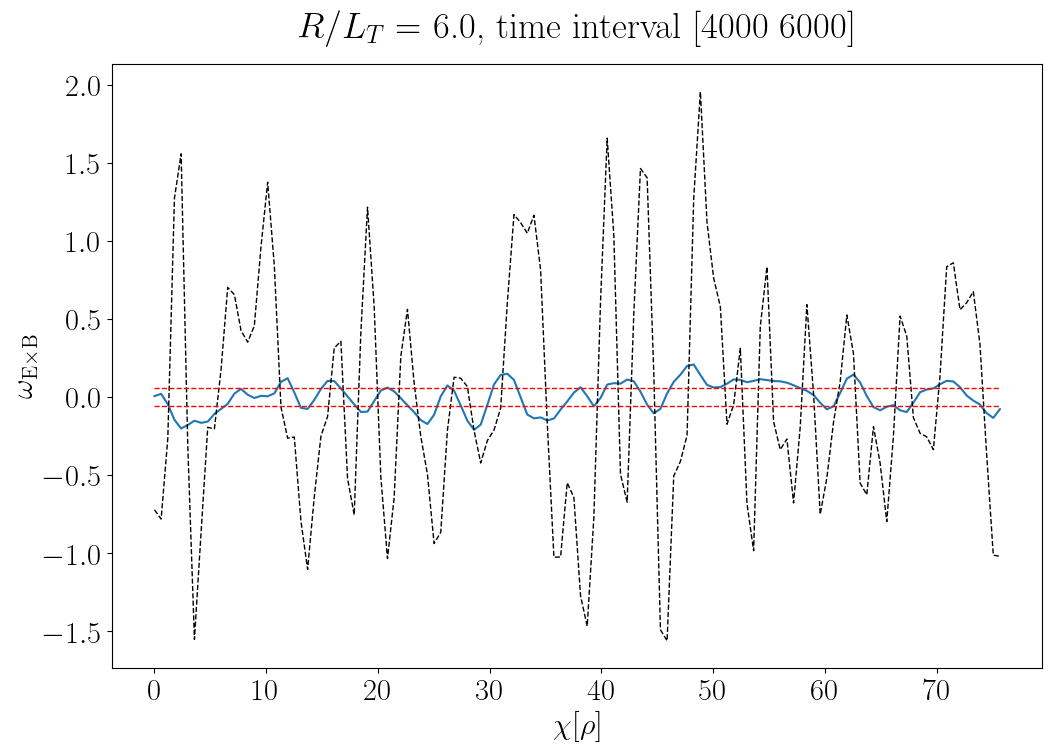

In [12]:
# Plot from 4000:6000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (5000)
start, end = 4000, 6000

wexb, wexb_middle = gkw.shearing_rate_wexb_interval(zonal_pot, dx, start, end)

wexb_fft = np.fft.fft(wexb)
wexb_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_fft)
wexb_amp_max = max(wexb_amp)

print('Maximal Amplitude: ',wexb_amp_max)

plt.plot(rad_coord, wexb)
plt.plot(rad_coord, wexb_middle, 'black', linestyle='--', linewidth=1)
plt.plot(rad_coord, np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
plt.plot(rad_coord, -np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)

plt.title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
plt.xlabel(r'$\chi[\rho]$')
plt.ylabel(r'$\omega_{\mathrm{E \times B}}$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')

Maximal Amplitude:  0.08653229899345787


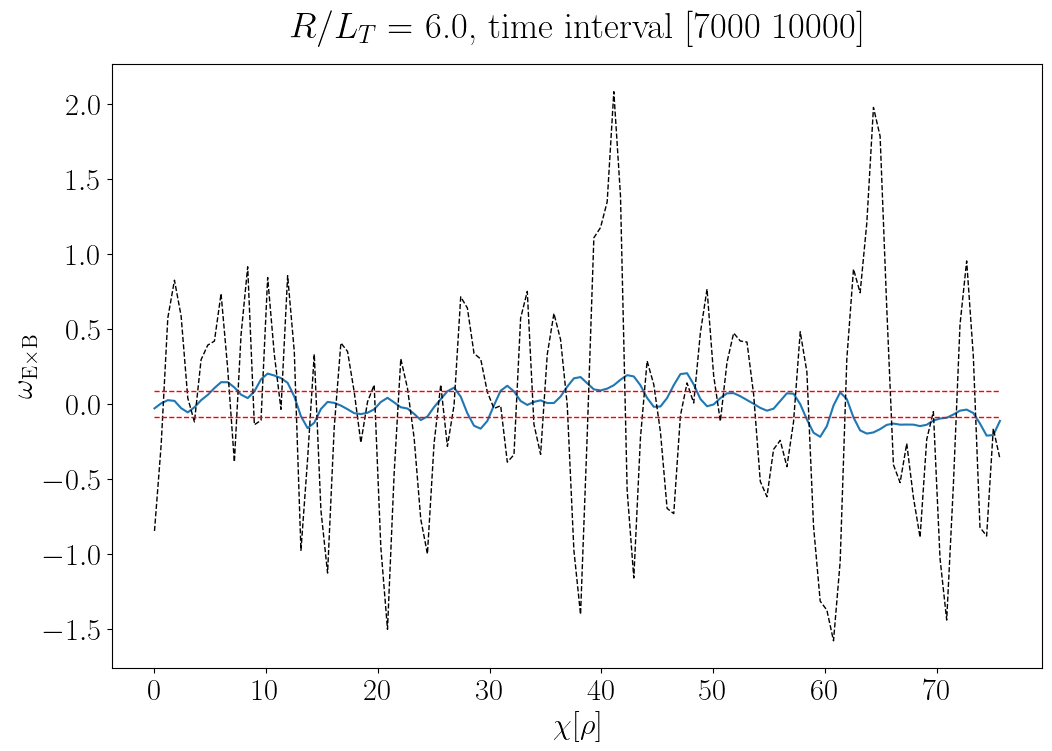

In [13]:
# Plot from 7000:10000 timesteps with mean over that interval
# Plot of a signal in the middle of the time interval (8500)
start, end = 7000, 10000

wexb, wexb_middle = gkw.shearing_rate_wexb_interval(zonal_pot, dx, start, end)

wexb_fft = np.fft.fft(wexb)
wexb_amp = 2/ zonal_pot.shape[0] * np.abs(wexb_fft)
wexb_amp_max = max(wexb_amp)

print('Maximal Amplitude: ', wexb_amp_max)

plt.plot(rad_coord, wexb)
plt.plot(rad_coord, wexb_middle, 'black', linestyle='--', linewidth=1)
plt.plot(rad_coord, np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)
plt.plot(rad_coord, -np.repeat(wexb_amp_max, len(rad_coord)), 'r', linestyle='--', linewidth=1)

plt.title(r'$R/L_T =$ ' + rlt + ', time interval [' + str(start) + ' ' + str(end) + ']', pad=20)
plt.xlabel(r'$\chi[\rho]$')
plt.ylabel(r'$\omega_{\mathrm{E \times B}}$')

plt.savefig('../pictures/'+data+'/'+resolution+'/'+data+'_'+resolution+'_wexb_'+str(start)+'_'+str(end)+'.pdf', bbox_inches='tight')